# Singapore MRT Ridership Analysis

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import numpy as np

In [179]:
dates = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
stations = ['Jurong East', 'Raffles Place', 'City Hall', 'Ang Mo Kio', 'Tampines']

data = []
for date in dates:
    for station in stations:
        ridership = np.random.randint(500000, 2000000)  # Random ridership numbers
        data.append({
            'station': station,
            'month': date.strftime('%Y-%m'),
            'ridership': ridership
        })

df = pd.DataFrame(data)
df.to_csv('mock_mrt_ridership.csv', index=False)

df['month'] = pd.to_datetime(df['month'])


In [180]:
conn = sqlite3.connect('ridershop.db')
df.to_sql('mrt_data', conn, if_exists='replace', index=False)

60

In [181]:
query = 'select * from mrt_data limit 5'
pd.read_sql(query, conn)

,station,month,ridership
0,Jurong East,2023-01-01 00:00:00,1664868
1,Raffles Place,2023-01-01 00:00:00,1135650
2,City Hall,2023-01-01 00:00:00,1406340
3,Ang Mo Kio,2023-01-01 00:00:00,1630984
4,Tampines,2023-01-01 00:00:00,1480840


## Find the month-over-month ridership growth.

In [182]:
query ='''
    with temp_table as (
            select strftime("%m", month) as month, station, ridership as curr_month_ridership,
            lag(ridership, 1) over (partition by station order by month) as prev_month_ridership
            from mrt_data
            order by month
    )

    select month, station,
    ((curr_month_ridership - prev_month_ridership)*100)/prev_month_ridership as growth_rate
    from temp_table
    order by growth_rate desc
    limit 5
'''

result = pd.read_sql(query, conn)

In [183]:
result

,month,station,growth_rate
0,10,City Hall,183
1,08,Raffles Place,156
2,10,Jurong East,148
3,09,Ang Mo Kio,138
4,07,Tampines,138


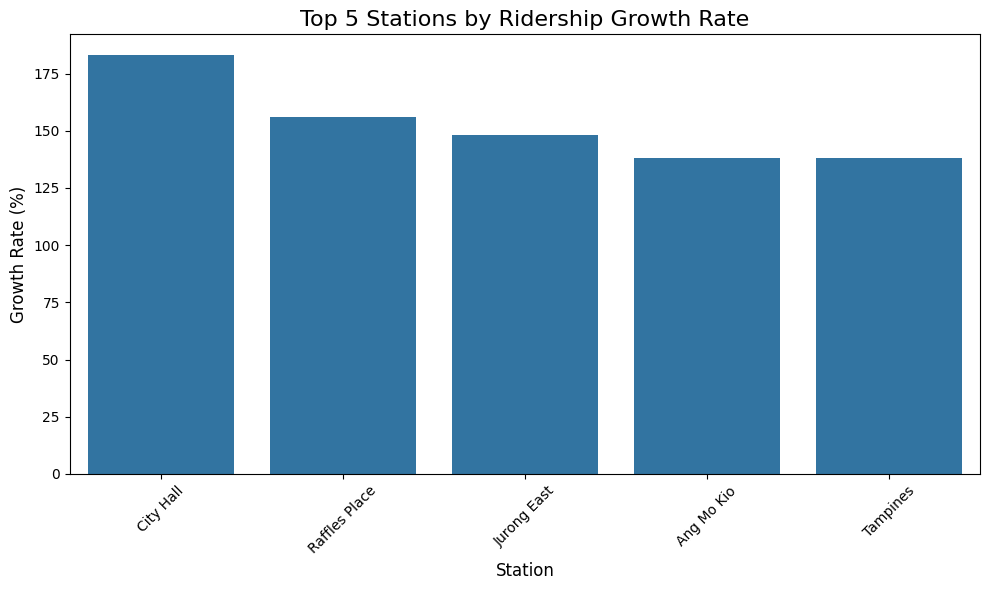

In [184]:
plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='station', y='growth_rate', errorbar=None)
plt.title('Top 5 Stations by Ridership Growth Rate', fontsize=16)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()